In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from dateutil import parser

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import tree

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm

## Data Exploration

In [2]:
# Loads data
dataset = pd.read_csv('MFG10YearTerminationData.csv')

In [3]:
# Checks size of dataset
dataset.shape

(49653, 18)

In [4]:
# Checks 18 columns names and types 
dataset.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

In [5]:
# Checks categorical values
categoricalValues = dataset.drop(["recorddate_key", "birthdate_key", "orighiredate_key", "terminationdate_key"], axis=1).select_dtypes(include=['object'])

for col in categoricalValues:
    print("Column Name: " + col + "\nValues =>")
    print(categoricalValues[col].unique())
    print("\n")

Column Name: city_name
Values =>
['Vancouver' 'Terrace' 'Nanaimo' 'Nelson' 'Kelowna' 'Victoria' 'Kamloops'
 'Fort St John' 'Surrey' 'Vernon' 'Quesnel' 'Chilliwack' 'Dawson Creek'
 'Squamish' 'New Westminster' 'Port Coquitlam' 'Cortes Island' 'Burnaby'
 'Bella Bella' 'Cranbrook' 'Williams Lake' 'Trail' 'Prince George'
 'Richmond' 'Grand Forks' 'West Vancouver' 'Abbotsford' 'Aldergrove'
 'Langley' 'North Vancouver' 'White Rock' 'New Westminister' 'Fort Nelson'
 'Haney' 'Valemount' 'Ocean Falls' 'Princeton' 'Dease Lake' 'Pitt Meadows'
 'Blue River']


Column Name: department_name
Values =>
['Executive' 'Store Management' 'Meats' 'Recruitment' 'Training'
 'Labor Relations' 'HR Technology' 'Employee Records' 'Compensation'
 'Legal' 'Produce' 'Accounts Receiveable' 'Bakery'
 'Information Technology' 'Accounts Payable' 'Audit' 'Accounting'
 'Investment' 'Dairy' 'Processed Foods' 'Customer Service']


Column Name: job_title
Values =>
['CEO' 'VP Stores' 'Legal Counsel' 'VP Human Resources' 'VP 

In [6]:
dataset.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [7]:
# Checks records for Employee #1318
dataset.loc[dataset['EmployeeID'] == 1318]

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


## Data Processing

In [8]:
# Lists if any changes on ['city_name','department_name','job_title','BUSINESS_UNIT'] for all duplicated EmployeeIDs
newDataset = dataset[['EmployeeID', 'city_name', 'department_name', 'job_title', 'BUSINESS_UNIT']]
newDataset = newDataset[newDataset.duplicated('EmployeeID', keep=False)]
duplicateds = newDataset[newDataset.duplicated(keep='last')]

merged = pd.merge(newDataset,duplicateds, how='outer', indicator=True)
merged.loc[merged._merge == 'left_only', ['EmployeeID']]

,EmployeeID


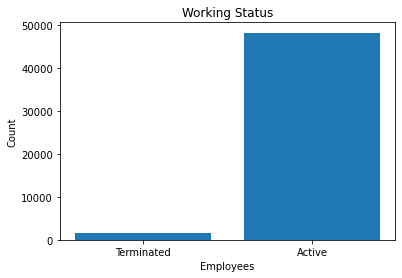

Terminated:  1485
Active:  48168


In [9]:
# Checks Active and Terminated columns because we keep last ones
statusTerminatedCount = len(dataset[dataset.STATUS == "TERMINATED"])
statusActiveCount = len(dataset[dataset.STATUS == "ACTIVE"])

plt.bar(["Terminated", "Active"],[statusTerminatedCount, statusActiveCount])
plt.xlabel("Employees")
plt.ylabel("Count")
plt.title("Working Status")
plt.show()
print("Terminated: ", statusTerminatedCount)
print("Active: ", statusActiveCount)

In [10]:

# Makes cities dummy with their population
city_pop_2020 = {'Vancouver':2313328,
                 'Victoria':289625,
                 'Nanaimo':84905,
                 'New Westminster':58549,
                 'Kelowna':125109,
                 'Burnaby':202799,
                 'Kamloops':68714,
                 'Prince George':65558,
                 'Cranbrook':18610,
                 'Surrey':394976,
                 'Richmond':182000,
                 'Terrace':19443,
                 'Chilliwack':77000,
                 'Trail':9707,
                 'Langley':23606,
                 'Vernon':47274,
                 'Squamish':19512,
                 'Quesnel':13799,
                 'Abbotsford':151683,
                 'North Vancouver':48000,
                 'Fort St John':17402,
                 'Williams Lake':14168,
                 'West Vancouver':42694,
                 'Port Coquitlam':114565,
                 'Aldergrove':12363,
                 'Fort Nelson':3561,
                 'Nelson':9813,
                 'New Westminister':58549,
                 'Grand Forks':4049,
                 'White Rock':66450,
                 'Haney':82256,
                 'Princeton':2828,
                 'Dawson Creek':10802,
                 'Bella Bella':1019,
                 'Ocean Falls':129,
                 'Pitt Meadows':174410,
                 'Cortes Island':1042,
                 'Valemount':1021,
                 'Dease Lake':335,
                 'Blue River':157}
#Make a copy of city names
dataset['Pop'] = dataset['city_name']

# Map from city name to population
dataset['Pop'] = dataset.Pop.map(city_pop_2020)

# Make a new column for population category
dataset['Pop_category'] = dataset.Pop

"""
Categorise according to population size
>= 100,000 is City
10,000 to 99,999 is Rural
< 10,000 is Remote
Thanks for @dredlaw for this classification example
Data is taken from https://worldpopulationreview.com/countries/cities/canada
"""
city_ix = (dataset['Pop'] >= 100000)
rural_ix = ((dataset['Pop'] < 100000) & (dataset['Pop'] >= 10000))
remote_ix = (dataset['Pop'] < 10000)
dataset.loc[city_ix, 'Pop_category'] = 'City'
dataset.loc[rural_ix, 'Pop_category'] = 'Rural'
dataset.loc[remote_ix, 'Pop_category'] = 'Remote'

dataset['Pop_category'] = dataset['Pop_category'].map({'City' : 0, 'Rural' : 1, 'Remote' : 2})

In [11]:
# Clusters job title
board = ['VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance',
         'Director, Accounts Receivable', 'Director, Accounting',
         'Director, Employee Records', 'Director, Accounts Payable',
         'Director, HR Technology', 'Director, Investments',
         'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

executive = ['Exec Assistant, Finance', 'Exec Assistant, Legal Counsel',
             'CHief Information Officer', 'CEO', 'Exec Assistant, Human Resources',
             'Exec Assistant, VP Stores']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']


employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

def changeTitle(row):
    if row in board:
        return 'board'
    elif row in executive:
        return 'executive'
    elif row in manager:
        return 'manager'
    else:
        return 'employee'
    
dataset['job_title'] = dataset['job_title'].apply(changeTitle)

In [12]:
# Makes all values useful for modelling
dataset = pd.get_dummies(dataset,columns=['job_title'])
dataset['gender'] = dataset['gender_short'].replace({'F':1, 'M':0})
dataset['status'] = dataset['STATUS'].replace({'ACTIVE':1, 'TERMINATED':0})
dataset['BUSINESS_UNIT'] = dataset['BUSINESS_UNIT'].replace({'STORES':1, 'HEADOFFICE':0})

In [13]:
# Makes all employees unique because there is no change on categoric columns
# Keeps last records
nonSequentialData = dataset.sort_values(['EmployeeID', 'length_of_service'], 
                                        ascending=[True, True]).drop_duplicates('EmployeeID', 
                                                                                keep='last').reset_index(drop=True)

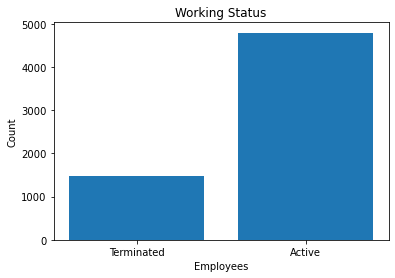

Terminated:  1485
Active:  4799


In [14]:
# Checks Active and Terminated columns because we keep last ones
statusTerminatedCount = len(nonSequentialData[nonSequentialData.STATUS == "TERMINATED"])
statusActiveCount = len(nonSequentialData[nonSequentialData.STATUS == "ACTIVE"])

plt.bar(["Terminated", "Active"],[statusTerminatedCount, statusActiveCount])
plt.xlabel("Employees")
plt.ylabel("Count")
plt.title("Working Status")
plt.show()
print("Terminated: ", statusTerminatedCount)
print("Active: ", statusActiveCount)

<AxesSubplot:>

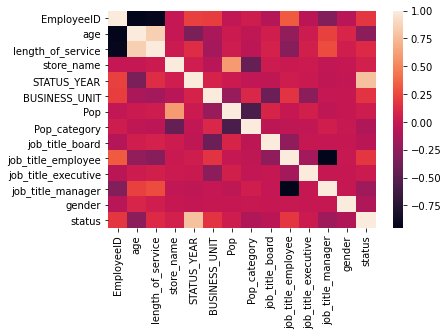

In [15]:
# Correlation Map
sns.heatmap(nonSequentialData.corr())

In [16]:
# Sorted absolute values of correalation matrix
nonSequentialData.corr().abs()['status'].sort_values(ascending=False)

status                 1.000000
STATUS_YEAR            0.782497
age                    0.264318
EmployeeID             0.178260
job_title_employee     0.177928
job_title_manager      0.174992
BUSINESS_UNIT          0.167382
length_of_service      0.121367
Pop_category           0.109118
gender                 0.105256
store_name             0.061885
job_title_board        0.053165
Pop                    0.034909
job_title_executive    0.017197
Name: status, dtype: float64

In [17]:
# Dropping operation
nonSequentialData = nonSequentialData.drop(
    [
     'gender_short', 'gender_full', 'STATUS',
     'city_name', 'EmployeeID', 'recorddate_key',
     'birthdate_key', 'orighiredate_key', 'terminationdate_key',
     'department_name','termreason_desc', 'termtype_desc'
     ], 
     axis=1
)

In [18]:
# Keeps EmployeeID and recorddate_key
sequentialData = dataset.drop(
    [
     'gender_short', 'gender_full', 'STATUS',
     'city_name',
     'birthdate_key', 'orighiredate_key', 'terminationdate_key',
     'department_name','termreason_desc', 'termtype_desc'
     ], 
     axis=1
)

## Modelling & Evaluation

In [19]:
# Seperates labeled value
label = nonSequentialData.status
nonSequentialData = nonSequentialData.drop('status', axis=1)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(nonSequentialData, label, test_size=0.3,
                                                    random_state=10)

In [22]:
# Make prediciton by a given model
def prediction(model, is_svc=False):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  score = round(accuracy_score(y_test, y_pred), 3)

  cm1 = cm(y_test, y_pred)

  sns.heatmap(cm1, annot=True, fmt=".0f")
  plt.xlabel('Predicted Values')
  plt.ylabel('Actual Values')
  plt.title('Accuracy Score: {0}'.format(score), size = 15)
  plt.show()

  y_proba = None

  if not is_svc:
    y_proba = model.predict_proba(x_test)
  else:
    model = CalibratedClassifierCV(model) 
    model.fit(x_train, y_train)
    y_proba = model.predict_proba(x_test)

  return y_pred, y_proba

#### Decision Tree

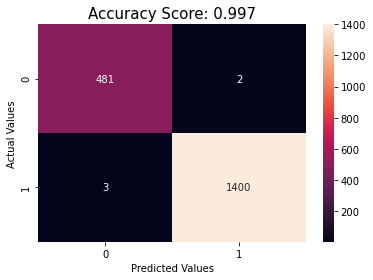

In [23]:
model_dt = tree.DecisionTreeClassifier()
y_pred_dt, y_proba_dt = prediction(model_dt)

#### SVC

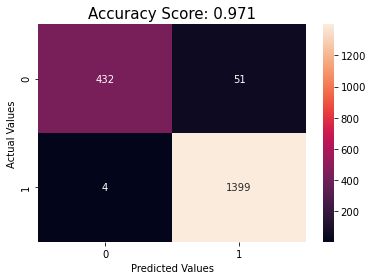

In [26]:
from sklearn.calibration import CalibratedClassifierCV
model_svc = SVC(C=10, gamma=0.01, kernel='rbf', random_state=10)
y_pred_svc, y_proba_svc = prediction(model_svc, True)

#### Evaluation

In [25]:
def display_eval_metrics(precision_1, recall_1, f1_1, precision_0, recall_0, f1_0):
  print()
  for var in display_eval_metrics.__code__.co_varnames:
    if var == "precision_0":
      print()
    if var == "var":
      continue
    print(var + ": " + str(vars()[var]))
  print("------------------------------------------------------------------------\n")


def get_eval_metrics(cm):
  tp = cm[1][1]
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]

  precision_1 = tp / (tp + fp)
  recall_1 = tp / (tp + fn)
  f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)

  precision_0 = tn / (tn + fn)
  recall_0 = tn / (tn + fp)
  f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)

  return precision_1, recall_1, f1_1, precision_0, recall_0, f1_0


def draw_roc_curve(predict_obj_list):

  for predict_obj in predict_obj_list:
    model_name = predict_obj[0]
    model_pred = predict_obj[1]

    fpr, tpr, thresholds = roc_curve(y_test.round(0).values.tolist(), model_pred.round(2).tolist(), drop_intermediate=False)
    auc_ = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = model_name + ' ROC curve (AUC = %0.2f)' % auc_);

  plt.legend(loc="lower right")
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate');

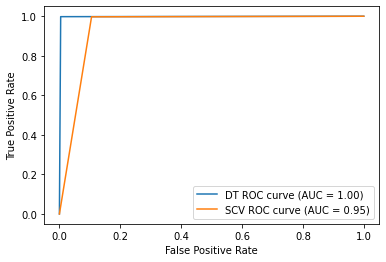

In [28]:
from sklearn.metrics import roc_curve, auc
draw_roc_curve([
     ("DT", y_pred_dt), 
     ("SCV", y_pred_svc)
])

__Entropy__: Entropy is the measurement of disorder or impurities in the information processed in machine learning. It determines how a decision tree chooses to split data.

__Mathematical Formula for Entropy__:
Consider a data set having a total number of N classes, then the entropy (E) can be determined with the formula below:

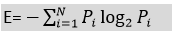

Where;

Pi = Probability of randomly selecting an example in class I;

Entropy always lies between 0 and 1, however depending on the number of classes in the dataset, it can be greater than 1. But the high value of

Let's understand it with an example where we have a dataset having three colors of fruits as red, green, and yellow. Suppose we have 2 red, 2 green, and 4 yellow observations throughout the dataset. Then as per the above equation:

E=−(prlog2pr+pplog2pp+pylog2py)

Where;

Pr = Probability of choosing red fruits;

Pg = Probability of choosing green fruits and;

Py = Probability of choosing yellow fruits.

__Gini index__: gini index is a measure of statistical dispersion intended to represent the income inequality or the wealth inequality within a nation or a social group.

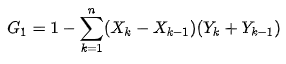

Xk is the cumulated proportion of the population variable, for k = 0,...,n, with X0 = 0, Xn = 1.
Yk is the cumulated proportion of the income variable, for k = 0,...,n, with Y0 = 0, Yn = 1.
Yk should be indexed in non-decreasing order (Yk > Yk – 1)

__Applications__:
Gini coefficient is widely used in fields as diverse as sociology, economics, health science, ecology, engineering and agriculture.

__Limitations__:
The Gini coefficient is a relative measure. It is possible for the Gini coefficient of a developing country to rise (due to increasing inequality of income) while the number of people in absolute poverty decreases. This is because the Gini coefficient measures relative, not absolute, wealth. Changing income inequality, measured by Gini coefficients, can be due to structural changes in a society such as growing population (baby booms, aging populations, increased divorce rates, extended family households splitting into nuclear families, emigration, immigration) and income mobility